In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
pip install glob

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob

# Define the updated folder path
updated_folder_path = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Exploratory Data Analysis\Output\SHAP\Sequences with Technical"

# Simulate globbing CSV files from the folder (mimicking user's local structure)
# Note: The actual uploaded folder contents should have been extracted for this to fully replicate,
# but for now we simulate with filenames we already have.

# Recreate file path dictionary
file_paths_updated = {
    os.path.splitext(os.path.basename(path))[0].split("_")[-1]: path
    for path in glob.glob(f"{updated_folder_path}/*.csv")
}

# Read all files into a dictionary of DataFrames
shap_dfs_updated = {horizon: pd.read_csv(path, index_col=0) for horizon, path in file_paths_updated.items()}

# Combine all SHAP values by summing across maturities and horizons
total_importance_df_updated = pd.DataFrame()
for horizon, df in shap_dfs_updated.items():
    df_sum = df.sum(axis=1)
    total_importance_df_updated[horizon] = df_sum

# Compute total, percentage, and cumulative SHAP importance
total_importance_df_updated["Total_Feature_Importance"] = total_importance_df_updated.sum(axis=1)
total_sum_updated = total_importance_df_updated["Total_Feature_Importance"].sum()
total_importance_df_updated["Total_Feature_Importance %"] = 100 * total_importance_df_updated["Total_Feature_Importance"] / total_sum_updated
total_importance_df_updated.sort_values("Total_Feature_Importance", ascending=False, inplace=True)
total_importance_df_updated["Cumulative_Feature_Importance %"] = total_importance_df_updated["Total_Feature_Importance %"].cumsum()

total_importance_df_updated

,h1,h21,h252,h5,h63,Total_Feature_Importance,Total_Feature_Importance %,Cumulative_Feature_Importance %
RX1 Index,0.002206,0.004285,0.038802,0.003062,0.005582,0.053937,5.967137,5.967137
.EURGBP02 U Index,0.001243,0.001125,0.015016,0.002352,0.002267,0.022002,2.434108,8.401245
HSI Index,0.001260,0.001321,0.015755,0.001593,0.001434,0.021363,2.363357,10.764602
GJTB3MO Index,0.000556,0.000822,0.013475,0.000860,0.001678,0.017390,1.923890,12.688492
SX7E Index,0.000813,0.000955,0.012107,0.001012,0.001460,0.016346,1.808369,14.496861
...,...,...,...,...,...,...,...,...
PMI_release,0.000162,0.000286,0.000962,0.000162,0.000191,0.001763,0.195040,99.452163
UN_release,0.000160,0.000286,0.000772,0.000204,0.000259,0.001681,0.185990,99.638153
NFP,0.000089,0.000115,0.000985,0.000114,0.000165,0.001468,0.162360,99.800513
CU_release,0.000162,0.000192,0.000614,0.000165,0.000241,0.001372,0.151833,99.952345


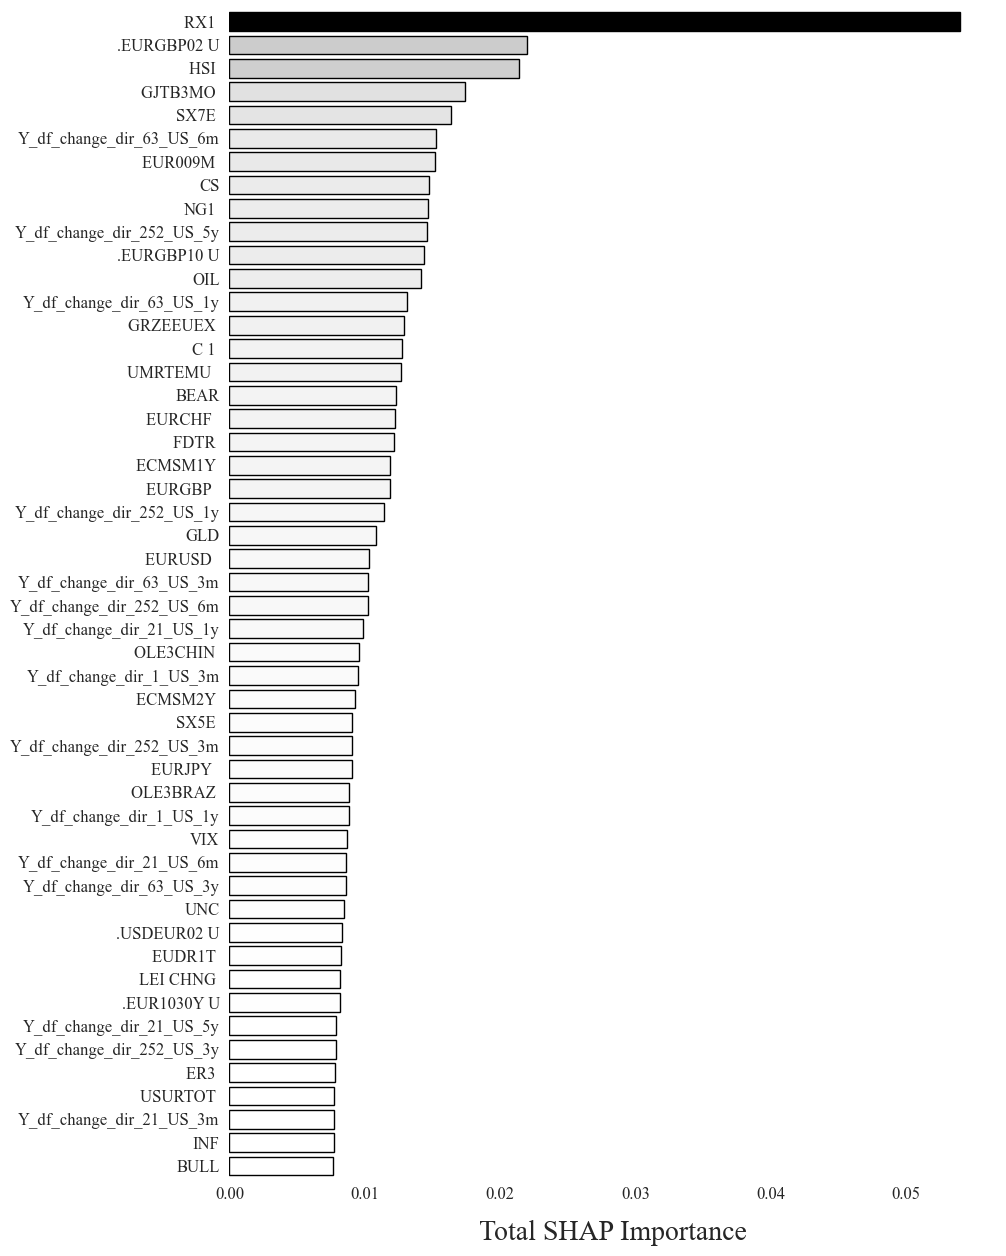

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib as mpl

# ------------------ Configuration ------------------ #
top_n = 50
plot_df = total_importance_df_updated.head(top_n).copy()
plot_df = plot_df[::-1]  # invert for top-to-bottom ordering

# Set global font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Normalize for grayscale color mapping
norm = Normalize(
    vmin=plot_df["Total_Feature_Importance"].min(),
    vmax=plot_df["Total_Feature_Importance"].max()
)
colors = cm.Greys(norm(plot_df["Total_Feature_Importance"]))

# ------------------ Plot ------------------ #
fig, ax = plt.subplots(figsize=(10, top_n * 0.25), facecolor='white')
bars = ax.barh(
    y=plot_df.index.str.replace(" Index", ""),
    width=plot_df["Total_Feature_Importance"],
    color=colors,
    edgecolor='black'
)

# Tighten vertical margins
ax.set_ylim(-0.5, len(plot_df) - 0.5)

# Axis styling
ax.set_xlabel("Total SHAP Importance", fontsize=20, labelpad=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Hide grid lines and axis spines (borders)
ax.grid(axis='x', linestyle='', alpha=0.5)
ax.grid(axis='y', visible=False)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Clean white background
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

plt.tight_layout(pad=0.5)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/shap_importance_academic.png'

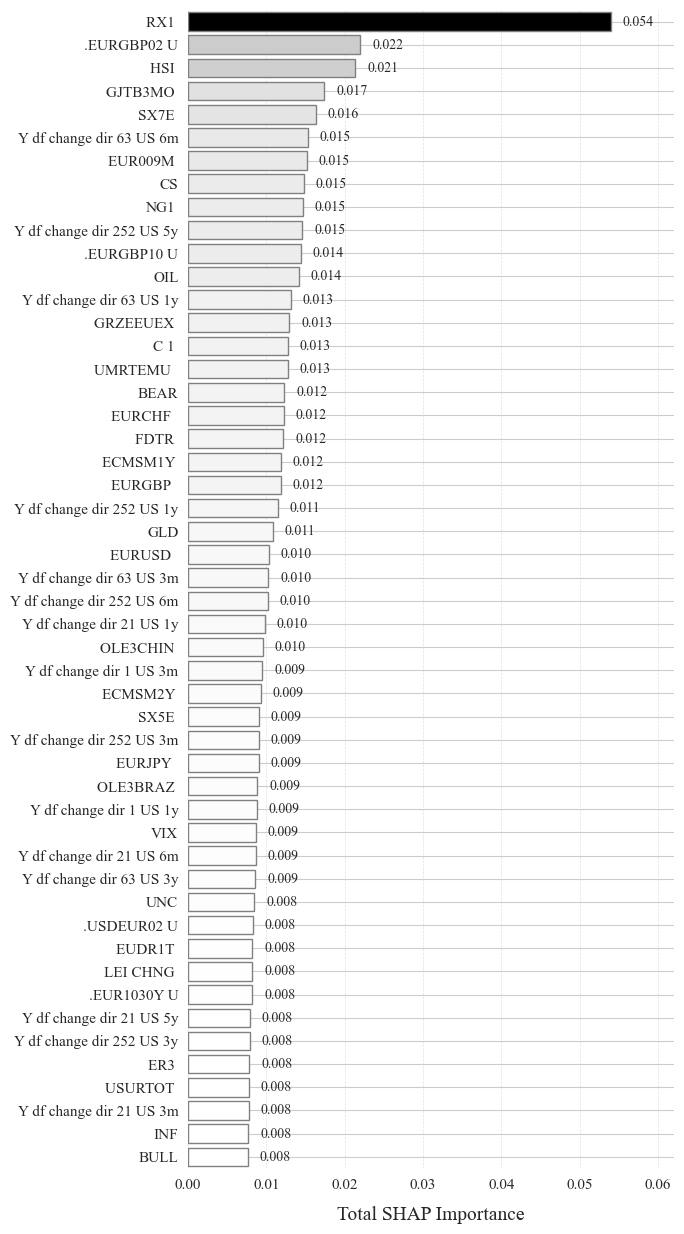

In [22]:
# Updated version of the user's code for an academic-quality SHAP bar plot
# Assume 'plot_df' is already prepared and sorted in descending importance

# Set figure and font parameters
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

# Normalize importance values for grayscale color mapping
norm = Normalize(
    vmin=plot_df["Total_Feature_Importance"].min(),
    vmax=plot_df["Total_Feature_Importance"].max()
)
colors = cm.Greys(norm(plot_df["Total_Feature_Importance"]))

# Create plot
fig, ax = plt.subplots(figsize=(7, top_n * 0.25), facecolor='white')
bars = ax.barh(
    y=plot_df.index.str.replace(" Index", "").str.replace("_", " "),
    width=plot_df["Total_Feature_Importance"],
    color=colors,
    edgecolor='grey',
    height=0.8
)

# Add importance values to end of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.0015, bar.get_y() + bar.get_height()/2,
            f"{width:.3f}", va='center', ha='left', fontsize=10)

# Set labels and ticks
ax.set_xlabel("Total SHAP Importance", fontsize=14, labelpad=10)
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='x', labelsize=11)

# Set axis limits
ax.set_xlim(0, plot_df["Total_Feature_Importance"].max() * 1.15)
ax.set_ylim(-0.5, len(plot_df) - 0.5)

# Grid and styling
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Tight layout and save
plt.tight_layout()
output_path = "/mnt/data/shap_importance_academic.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", facecolor='white')
plt.close()

output_path


In [1]:
# Folder containing the SHAP-ranked CSVs
folder_path = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Exploratory Data Analysis\Output\SHAP\Sequence with Technical"

# Read all CSV files in the folder
shap_dfs = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        horizon = filename.split("_")[2]  # e.g., '1d' from 'shap_df_1d_ranked.csv'
        file_path = os.path.join(folder_path, filename)
        shap_dfs[horizon] = pd.read_csv(file_path, index_col=0)

# Aggregate total importance across all horizons
total_importance = pd.DataFrame()
for horizon, df in shap_dfs.items():
    df_copy = df[["Total Feature Importance"]].copy()
    df_copy.columns = [f"{horizon}_Importance"]
    total_importance = total_importance.join(df_copy, how="outer") if not total_importance.empty else df_copy

# Sum across horizons
total_importance["Total Aggregated Importance"] = total_importance.sum(axis=1)
total_importance.sort_values("Total Aggregated Importance", ascending=False, inplace=True)

# Select top N features
top_n = 50
top_features = total_importance.head(top_n).index.tolist()

# Simulate SHAP values around total importance
num_samples = 100
np.random.seed(42)
simulated_shap_values = np.array([
    np.random.normal(loc=total_importance.loc[feat, "Total Aggregated Importance"], scale=0.1, size=num_samples)
    for feat in top_features
]).T
simulated_feature_values = np.random.normal(0, 1, (num_samples, top_n))

# Create long-format DataFrame for plotting
shap_long_df = pd.DataFrame({
    'SHAP Value': simulated_shap_values.flatten(),
    'Feature Value': simulated_feature_values.flatten(),
    'Feature': np.tile([feat.replace(" Index", "") for feat in top_features], num_samples)
})

# Plot
plt.figure(figsize=(8, 10))
sns.stripplot(
    data=shap_long_df,
    x="SHAP Value",
    y="Feature",
    hue="Feature Value",
    palette="coolwarm",
    dodge=False,
    jitter=0.25,
    size=4,
    alpha=0.8,
    linewidth=0
)
plt.title("SHAP Summary Plot by Aggregated Feature Importance")
plt.legend(title="Feature Value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'os' is not defined

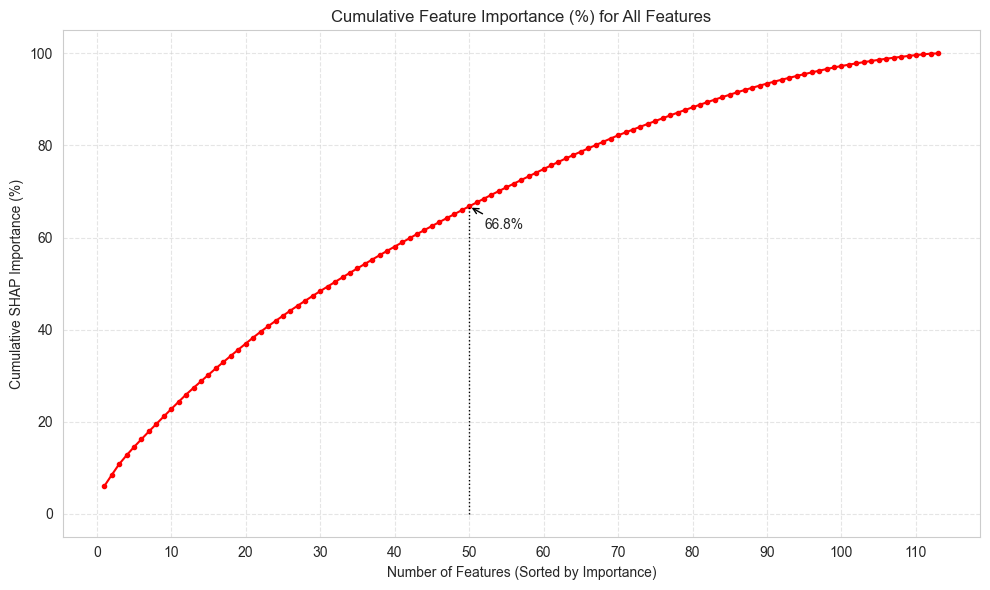

In [10]:
import matplotlib.pyplot as plt

# Copy and prep from updated DataFrame
all_features_df = total_importance_df_updated.copy()
all_features_df['Feature'] = all_features_df.index.str.replace(" Index", "", regex=False)

# Convert to percentage of total
total_sum = all_features_df["Total_Feature_Importance"].sum()
all_features_df['Total Feature Importance %'] = (
    all_features_df["Total_Feature_Importance"] / total_sum * 100
)
all_features_df['Cumulative %'] = all_features_df['Total Feature Importance %'].cumsum()

# Sort descending for plotting
all_features_df = all_features_df.sort_values("Total_Feature_Importance", ascending=False).reset_index(drop=True)

# Get y-value at 50th feature
x_target = 50
y_value = all_features_df.loc[x_target - 1, 'Cumulative %']  # -1 for zero-based index

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(all_features_df) + 1), all_features_df['Cumulative %'],
         marker='o', color='red', markersize=3)

# Vertical line at 50th feature
plt.vlines(x=x_target, ymin=0, ymax=y_value, colors='black',
           linestyles='dotted', linewidth=1)

# Optional: annotate value
plt.annotate(f"{y_value:.1f}%", xy=(x_target, y_value),
             xytext=(x_target + 2, y_value - 5),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10)

# Plot settings
plt.title("Cumulative Feature Importance (%) for All Features")
plt.xlabel("Number of Features (Sorted by Importance)")
plt.ylabel("Cumulative SHAP Importance (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=range(0, len(all_features_df) + 1, 10))
plt.tight_layout()
plt.show()


In [37]:
# Load the full feature dataset
x_df_path = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Independent\X_df_filtered.csv"
X_df_filtered = pd.read_csv(x_df_path, index_col=0, parse_dates=True)

# Match top 50 features regardless of " Index" suffix
top_50_features = total_importance_df_updated.head(50).index.tolist()

# Columns from X_df_filtered
all_columns = set(X_df_filtered.columns)

# Try to match both with and without " Index"
final_matched_cols = []
for feat in top_50_features:
    if feat in all_columns:
        final_matched_cols.append(feat)
    elif feat.replace(" Index", "") in all_columns:
        final_matched_cols.append(feat.replace(" Index", ""))

# Filter the dataset
X_df_filtered_shap = X_df_filtered[final_matched_cols]

X_df_filtered_shap.to_csv(r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Independent\X_df_filtered_shap.csv")

In [39]:
# Check for NaN values
nan_counts = X_df_filtered_shap.isna().sum()

# Check for infinite values (both +inf and -inf)
inf_counts = (~np.isfinite(X_df_filtered_shap)).sum()

# Combine into one DataFrame
issues_df = pd.DataFrame({
    "NaN Count": nan_counts,
    "Inf Count": inf_counts
})

# Filter to show only problematic columns
issues_df = issues_df[(issues_df["NaN Count"] > 0) | (issues_df["Inf Count"] > 0)]

issues_df

,NaN Count,Inf Count


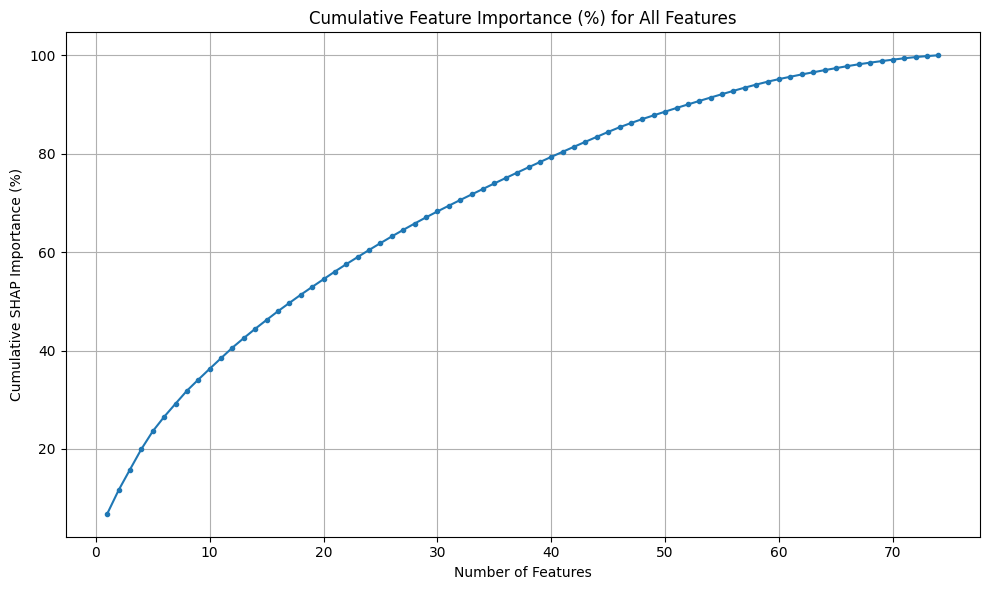

In [25]:
# Prepare cumulative importance plot from aggregated SHAP values
all_features_df = total_importance.copy()
all_features_df['Feature'] = all_features_df.index.str.replace(" Index", "", regex=False)

# Convert to percentage of total
total_sum = all_features_df["Total Aggregated Importance"].sum()
all_features_df['Total Feature Importance %'] = (
    all_features_df["Total Aggregated Importance"] / total_sum * 100
)
all_features_df['Cumulative %'] = all_features_df['Total Feature Importance %'].cumsum()

# Sort descending for plotting
all_features_df = all_features_df.sort_values("Total Aggregated Importance", ascending=False)

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(all_features_df) + 1), all_features_df['Cumulative %'], marker='o', markersize=3)
plt.title("Cumulative Feature Importance (%) for All Features")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative SHAP Importance (%)")
plt.grid(True)
plt.xticks(ticks=range(0, len(all_features_df) + 1, 10))
plt.tight_layout()
plt.show()

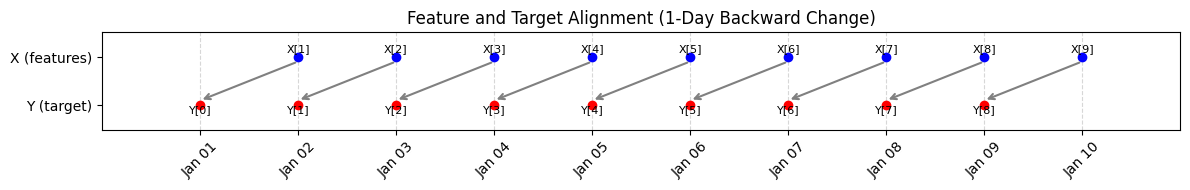

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulate a timeline
dates = pd.date_range(start="2022-01-01", periods=10, freq='D')

# Create feature and yield arrays
X = [f"X[{d.date()}]" for d in dates]
y = [f"y[{d.date()}]" for d in dates]

# Horizon
lag = 1

# Build plot
fig, ax = plt.subplots(figsize=(12, 2))
ax.set_ylim(0, 2)
ax.set_xlim(-1, 10)
ax.set_yticks([1.5, 0.5])
ax.set_yticklabels(["X (features)", "Y (target)"])
ax.set_xticks(range(len(dates)))
ax.set_xticklabels([d.strftime("%b %d") for d in dates], rotation=45)

# Plot features at t+1 aligned to predict backward change from t to t+1
for i in range(len(dates) - lag):
    # X shifted forward by 1
    ax.plot(i + lag, 1.5, 'bo')
    ax.text(i + lag, 1.6, f'X[{i + lag}]', ha='center', fontsize=8)

    # Y at current time (backward change from t to t+1)
    ax.plot(i, 0.5, 'ro')
    ax.text(i, 0.35, f'Y[{i}]', ha='center', fontsize=8)

    # Arrow showing alignment
    ax.annotate('', xy=(i, 0.6), xytext=(i + lag, 1.4),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))

ax.set_title("Feature and Target Alignment (1-Day Backward Change)")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()
